In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.dpi'] = 100.0

import sys
sys.path.append('/global/projecta/projectdirs/lsst/descqa/lib/descqa-conda/lib/python2.7/site-packages')
sys.path.append('generic-catalog-reader')

In [2]:
from GCR import load_catalog

In [3]:
gc = dict()
gc['AlphaQ'] = load_catalog('generic-catalog-reader/catalogs/proto-dc2-v1.0.yaml')
gc['Buzzard'] = load_catalog('generic-catalog-reader/catalogs/buzzard_v1.5.yaml')

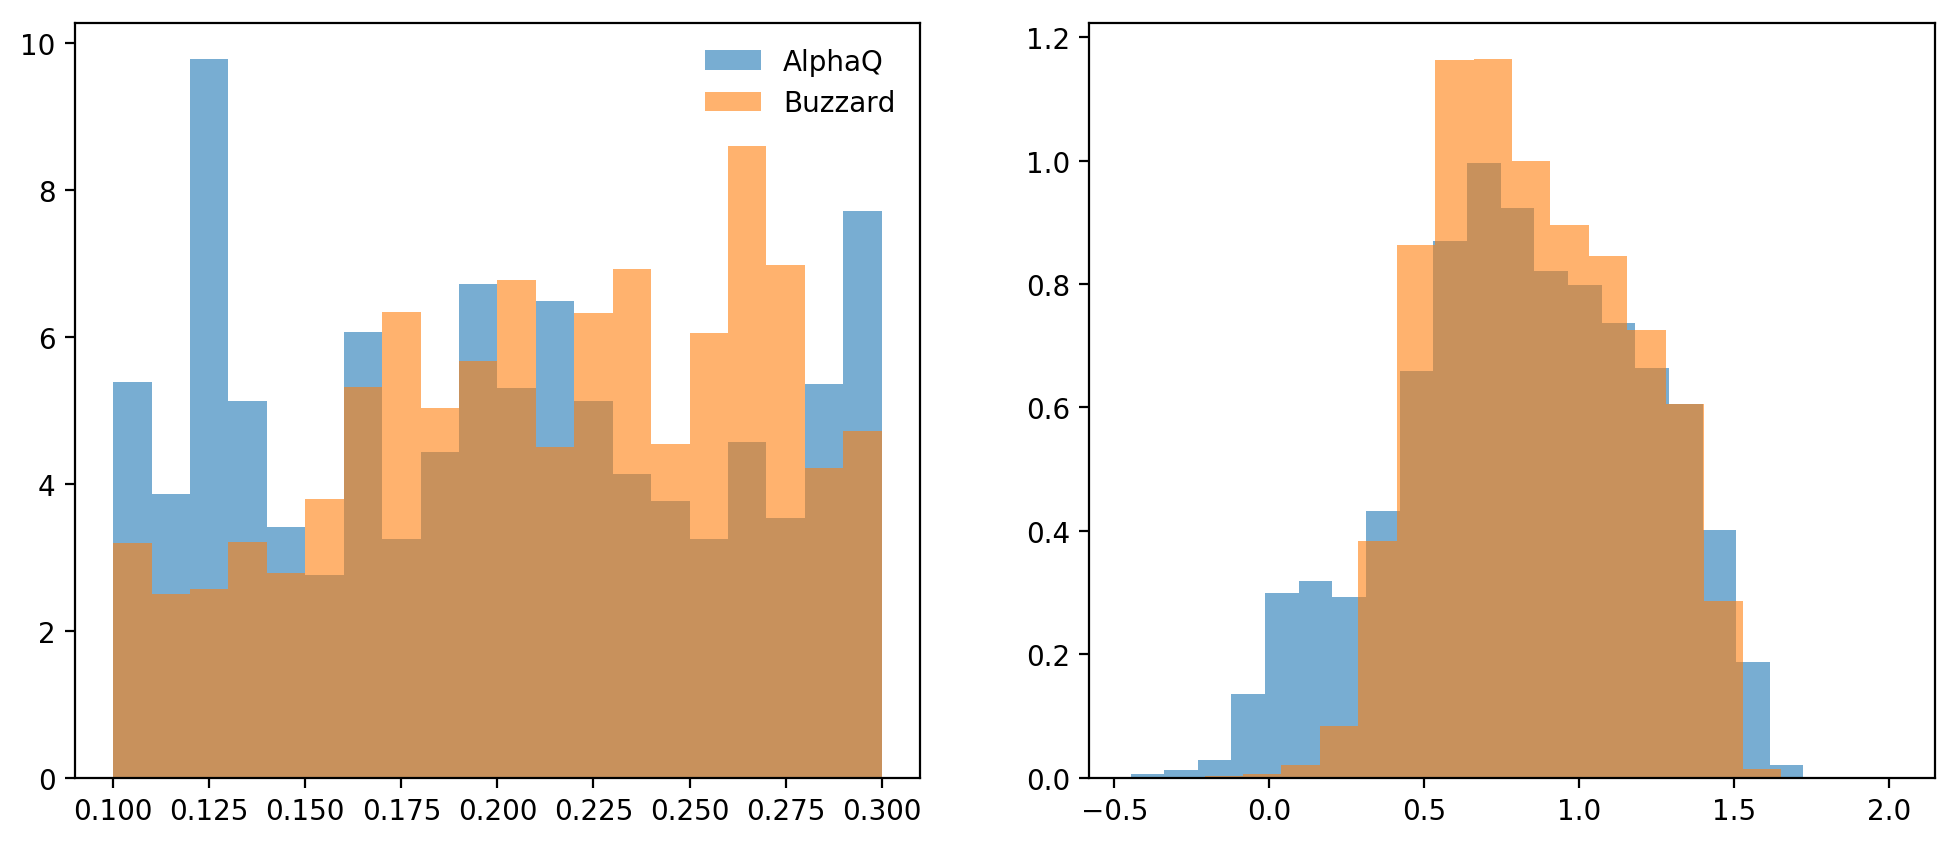

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
for label, gc_this in gc.items():
    data = next(gc_this.get_quantities(['redshift_true', 'mag_g_any', 'mag_r_any'], 
                                  filters=[(lambda z: (z > 0.1) & (z < 0.3), 'redshift_true')], 
                                  return_iterator=True, return_ndarray=True))
    data = data[np.isfinite(data['mag_g_any']) & np.isfinite(data['mag_r_any'])]
    data = data[data['mag_r_any'] < 22.0]
    ax[0].hist(data['redshift_true'], 20, normed=True, alpha=0.6, label=label);
    ax[1].hist(data['mag_g_any'] - data['mag_r_any'], 20, normed=True, alpha=0.6);

ax[0].legend(frameon=False);

In [6]:
gc['AlphaQ'].list_all_native_quantities()

['redshift',
 'totalLuminositiesStellar:SDSS_z:observed',
 'diskLuminositiesStellar:SDSS_i:rest',
 'spheroidLuminositiesStellar:SDSS_z:observed',
 'magnitude:SDSS_g:rest',
 'spheroidLuminositiesStellar:SDSS_z:rest',
 'totalLuminositiesStellar:SDSS_z:rest',
 'spheroidStarFormationRate',
 'parentIndex',
 'm0',
 'totalLuminositiesStellar:SDSS_g:observed',
 'magnitude:SDSS_z:observed',
 'totalLuminositiesStellar:SDSS_g:rest',
 'diskAbundancesGasMetals',
 'mergingStatisticsGalaxyMajorMergerTime',
 'totalLuminositiesStellar:SDSS_u:rest',
 'diskAbundancesStellarMetals',
 'diskLuminositiesStellar:SDSS_z:observed',
 'totalAbundancesGasMetals',
 'magnitude:SDSS_r:rest',
 'totalAngularMomentum',
 'diskRadius',
 'totalStarFormationRate',
 'ageStatisticsDiskTimeWeightedIntegratedSFR',
 'spheroidMassGas',
 'spinSpin',
 'infallHaloTag',
 'shear2',
 'diskStarFormationRate',
 'mergingStatisticsNodeFormationTime',
 'diskLuminositiesStellar:SDSS_g:rest',
 'diskLuminositiesStellar:SDSS_r:observed',
 'tota

In [7]:
gc['Buzzard'].get_input_kwargs()

{'catalog_dir': '/global/project/projectdirs/lsst/jderose/BCC/Chinchilla/Herd/Chinchilla-0/addgalspostprocess',
 'catalog_subdirs': ['truth'],
 'cosmo_Omega_M0': 0.286,
 'cosmo_h': 0.7,
 'creators': ['Joe DeRose'],
 'filename_template': 'Chinchilla-0_lensed.{}.fits',
 'npix': 768,
 'subclass_name': 'BuzzardGalaxyCatalog'}